In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
df=pd.read_csv('HR Data.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.shape

(1470, 35)

In [9]:
df.size

51450

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
df['EmployeeNumber'].size

1470

In [12]:
len(df['EmployeeNumber'].unique()) # To checked whether all the Enployee numbers are unique or not and calculating the length

1470

## Data cleansing involves removing unnecessary columns

In [13]:
data=pd.DataFrame(df[['EmployeeNumber','Department','JobRole','StandardHours','HourlyRate','OverTime','MonthlyRate','PercentSalaryHike','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TrainingTimesLastYear']])

In [14]:
data.shape

(1470, 13)

In [14]:
# data_unique=data.drop_duplicates()

## Changing the column headings in the dataframe

In [17]:
new_data=['Employee ID','Department','Job Role','Std Hours','Hourly Rate','Over Time','Monthly Rate','% Salary Hike','Years at Company','Years in Current Role','Years since Last Promotion','Years with Current Manager','Training Time Last Year']
len(new_data)

13

In [18]:
data.columns=new_data

In [19]:
data.head()

,Employee ID,Department,Job Role,Std Hours,Hourly Rate,Over Time,Monthly Rate,% Salary Hike,Years at Company,Years in Current Role,Years since Last Promotion,Years with Current Manager,Training Time Last Year
0,1,Sales,Sales Executive,80,94,Yes,19479,11,6,4,0,5,0
1,2,Research & Development,Research Scientist,80,61,No,24907,23,10,7,1,7,3
2,4,Research & Development,Laboratory Technician,80,92,Yes,2396,15,0,0,0,0,3
3,5,Research & Development,Research Scientist,80,56,Yes,23159,11,8,7,3,0,3
4,7,Research & Development,Laboratory Technician,80,40,No,16632,12,2,2,2,2,3


In [20]:
data.tail()

,Employee ID,Department,Job Role,Std Hours,Hourly Rate,Over Time,Monthly Rate,% Salary Hike,Years at Company,Years in Current Role,Years since Last Promotion,Years with Current Manager,Training Time Last Year
1465,2061,Research & Development,Laboratory Technician,80,41,No,12290,17,5,2,0,3,3
1466,2062,Research & Development,Healthcare Representative,80,42,No,21457,15,7,7,1,7,5
1467,2064,Research & Development,Manufacturing Director,80,87,Yes,5174,20,6,2,0,3,0
1468,2065,Sales,Sales Executive,80,63,No,13243,14,9,6,0,8,3
1469,2068,Research & Development,Laboratory Technician,80,82,No,10228,12,4,3,1,2,3


## Checking the redundant data

In [18]:
# data.drop_dupliates(subset='')

In [19]:
# data['MonthlyRate'].drop_duplicates()

In [21]:
data.drop_duplicates(subset=['Employee ID'])

,Employee ID,Department,Job Role,Std Hours,Hourly Rate,Over Time,Monthly Rate,% Salary Hike,Years at Company,Years in Current Role,Years since Last Promotion,Years with Current Manager,Training Time Last Year
0,1,Sales,Sales Executive,80,94,Yes,19479,11,6,4,0,5,0
1,2,Research & Development,Research Scientist,80,61,No,24907,23,10,7,1,7,3
2,4,Research & Development,Laboratory Technician,80,92,Yes,2396,15,0,0,0,0,3
3,5,Research & Development,Research Scientist,80,56,Yes,23159,11,8,7,3,0,3
4,7,Research & Development,Laboratory Technician,80,40,No,16632,12,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,Research & Development,Laboratory Technician,80,41,No,12290,17,5,2,0,3,3
1466,2062,Research & Development,Healthcare Representative,80,42,No,21457,15,7,7,1,7,5
1467,2064,Research & Development,Manufacturing Director,80,87,Yes,5174,20,6,2,0,3,0
1468,2065,Sales,Sales Executive,80,63,No,13243,14,9,6,0,8,3


Since no redundancy is present in the Employee ID. Hence we don't need to delete redundant datas as redundancy in Employee ID can consider as a major major issue.

### Sanitizing monthly rate column.

In [22]:
data.drop_duplicates(subset=['Monthly Rate'])

,Employee ID,Department,Job Role,Std Hours,Hourly Rate,Over Time,Monthly Rate,% Salary Hike,Years at Company,Years in Current Role,Years since Last Promotion,Years with Current Manager,Training Time Last Year
0,1,Sales,Sales Executive,80,94,Yes,19479,11,6,4,0,5,0
1,2,Research & Development,Research Scientist,80,61,No,24907,23,10,7,1,7,3
2,4,Research & Development,Laboratory Technician,80,92,Yes,2396,15,0,0,0,0,3
3,5,Research & Development,Research Scientist,80,56,Yes,23159,11,8,7,3,0,3
4,7,Research & Development,Laboratory Technician,80,40,No,16632,12,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,Research & Development,Laboratory Technician,80,41,No,12290,17,5,2,0,3,3
1466,2062,Research & Development,Healthcare Representative,80,42,No,21457,15,7,7,1,7,5
1467,2064,Research & Development,Manufacturing Director,80,87,Yes,5174,20,6,2,0,3,0
1468,2065,Sales,Sales Executive,80,63,No,13243,14,9,6,0,8,3


Since redundancy was there so the redundent rows are deleted from the whole dataframe.

### Describing the dataset to get insightes

In [23]:
data.describe()

,Employee ID,Std Hours,Hourly Rate,Monthly Rate,% Salary Hike,Years at Company,Years in Current Role,Years since Last Promotion,Years with Current Manager,Training Time Last Year
count,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,80.0,65.891156,14313.103401,15.209524,7.008163,4.229252,2.187755,4.123129,2.799320
std,602.024335,0.0,20.329428,7117.786044,3.659938,6.126525,3.623137,3.222430,3.568136,1.289271
min,1.000000,80.0,30.000000,2094.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,80.0,48.000000,8047.000000,12.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,1020.500000,80.0,66.000000,14235.500000,14.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,1555.750000,80.0,83.750000,20461.500000,18.000000,9.000000,7.000000,3.000000,7.000000,3.000000
max,2068.000000,80.0,100.000000,26999.000000,25.000000,40.000000,18.000000,15.000000,17.000000,6.000000


### Defining the unique values present in the Job Role column

In [24]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

As it is necessary to define how many job roles are present in the company

In [25]:
df['JobRole'].unique().size # Total number of designations

9

It is defining the main departments of the company

In [26]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [27]:
data[['Department','Employee ID']]

,Department,Employee ID
0,Sales,1
1,Research & Development,2
2,Research & Development,4
3,Research & Development,5
4,Research & Development,7
...,...,...
1465,Research & Development,2061
1466,Research & Development,2062
1467,Research & Development,2064
1468,Sales,2065


In [29]:
data_work=data['Department'].value_counts()

This defines that how many persons are working in the departments

In [30]:
data_work

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Text(0.5, 1.0, 'Comparing the number of Employees in all Department')

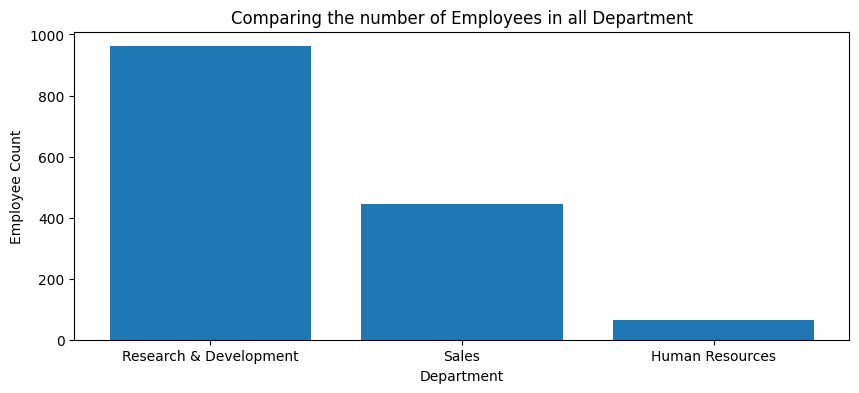

In [31]:
plt.figure(figsize=(10,4))
plt.bar(data_work.index,data_work.values)
plt.xlabel('Department')
plt.ylabel('Employee Count')
plt.title('Comparing the number of Employees in all Department')

In [32]:
job_role_num=data['Job Role'].value_counts()

In [33]:
job_role_num

Job Role
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

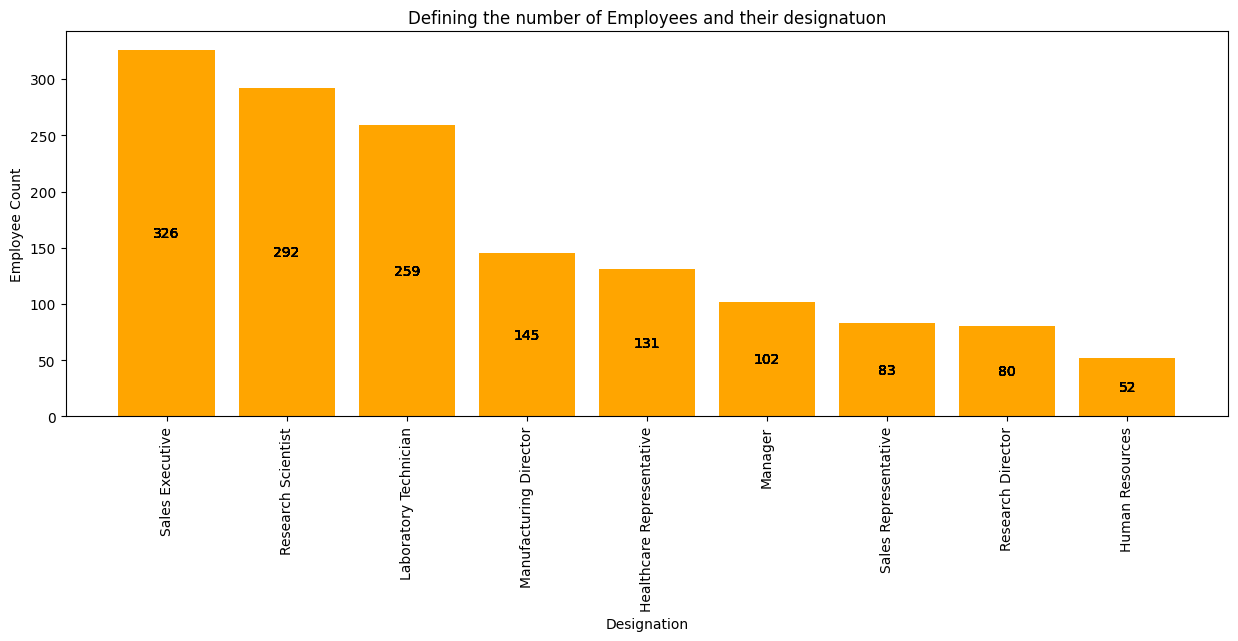

In [34]:
plt.figure(figsize=(15,5))
for i in job_role_num.items():
    p = plt.bar(job_role_num.index, job_role_num.values,color='orange')
    plt.bar_label(p, label_type='center')
plt.xlabel('Designation')
plt.ylabel('Employee Count')
plt.title('Defining the number of Employees and their designatuon')
plt.xticks(rotation='vertical')
plt.show()


### Cheking whether anu NaN value is present or not.

In [37]:
data.isnull().sum()

Employee ID                   0
Department                    0
Job Role                      0
Std Hours                     0
Hourly Rate                   0
Over Time                     0
Monthly Rate                  0
% Salary Hike                 0
Years at Company              0
Years in Current Role         0
Years since Last Promotion    0
Years with Current Manager    0
Training Time Last Year       0
dtype: int64

DataFrame contain zero NaN value